Ở bài này, mình sẽ cùng các bạn tìm hiểu về các function trong Deep Learning, đặc biệt là các hàm được hỗ trợ bởi Tensorflow

Trước hết, hãy cùng mình đi qua về các hàm Activation trong được sử dụng trong các Layers, hay còn gọi là các hàm kích hoạt.

Các hàm activation function:

sigmoid:

- công thức: f(x) = 1 / (1 + exp(-x))
- đạo hàm: f'(x) = f(x) * (1 - f(x))
- đầu ra: (0, 1)

linear:
- công thức: f(x) = x
- đạo hàm: f'(x) = 1
- đầu ra: (-inf, inf)

tanh:

- công thức: f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
- đạo hàm: f'(x) = 1 - f(x)^2
- đầu ra: (-1, 1)

ReLU:

- công thức: f(x) = max(0, x)
- đạo hàm: f'(x) = 1 nếu x > 0, 0 nếu x <= 0
- đầu ra: (0, inf)
- nếu mô hình có quá nhiều giá trị của x khiến đạo hàm của relu =0 dẫn đến việc mô hình không học được gì thì có thể sử dụng leaky_relu

leaky relu:
- công thức: f(x) = x if x > 0 else alpha * x
- đạo hàm: f'(x) = 1 if x > 0 else alpha
- đầu ra: (-inf, inf)
- alpha thường được chọn là 0.01
- leaky relu giúp giảm tình trạng dying relu của relu
    
Softmax:

- công thức: f(x) = exp(x) / sum(exp(x))
- đạo hàm: f'(x) = f(x) * (1 - f(x))
- đầu ra: (0, 1)

SiLU:

- công thức: f(x) = x * sigmoid(x)
- đạo hàm: f'(x) = sigmoid(x) + x * sigmoid(x) * (1 - sigmoid(x))
- đầu ra: (-1, inf)
- điểm khác với relu: siLU có thể nhận giá trị âm
- điểm khác với sigmoid: siLU có thể nhận giá trị lớn hơn 1

    
Nhận xét:
- sigmoid: dễ bị mất gradient khi x lớn hoặc nhỏ vì vanishing gradient
- linear: không giữ được đặc tính non-linear của mô hình nên ít được sử dụng, lí do không giữ được đặc tính non-linear là vì đạo hàm luôn là 1
- tanh: tốt hơn sigmoid vì đầu ra nằm trong khoảng (-1, 1) nên ít bị vanishing gradient hơn
- relu: được sử dụng nhiều vì tính đơn giản và hiệu quả, không bị vanishing gradient với x > 0, nhưng có thể bị dying relu với x < 0, điều này có thể được giải quyết bằng cách sử dụng leaky relu
- softmax: được sử dụng nhiều ở output layer của mô hình phân loại vì đầu ra là xác suất của các class, tôi có thể nói là cứ phân loại thì anh em cứ dùng softmax
- siLU: được sử dụng nhiều vì có thể nhận giá trị âm và lớn hơn 1, giúp mô hình học được nhiều hơn so với relu

Nhận xét:
- trong các bài toán phân loại, chúng ta thường sử dụng hàm softmax để tính xác suất của mỗi class.
- trong các bài toán hồi quy, chúng ta thường sử dụng hàm sigmoid để tính xác suất của một class.
- ngoài ra, hàm linear cũng được sử dụng trong một số trường hợp nhất định như trong bài toán hồi quy tuyến tính, output của mô hình là một giá trị liên tục.
- trong các bài có kiểu dữ liệu tabular, các hàm hay được sử dụng là tanh, sigmoid, siLU vì chúng có đầu ra dạng yes/no, 0/1, -1/1. Tuy nhiên, như anh em đã biết, với kiểu dữ liệu dạng bảng(tabular), chúng ta thường sử dụng các mô hình như Random Forest, Decision Tree vì tính cân xứng đối giữa các feature.

Muốn sử dụng các hàm activation function này, chúng ta cần phải chuẩn hóa dữ liệu trước khi đưa vào mô hình, điều này làm tăng thời gian xử lý và không hiệu quả. 
Ngoài ra cũng có thể tăng thêm các layer để mô hình học được tốt hơn, việc tăng chiều sâu của mô hình cũng là một cách để mô hình học được tốt hơn, tuy nhiên cũng cần phải cân nhắc vì việc tăng chiều sâu của mô hình cũng làm tăng thời gian xử lý.

Dưới đây, mình sẽ biểu diễn các hàm kích hoạt:


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def linear(x):
    return x
def relu(x):
    return np.maximum(0, x)
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
def leaky_relu(x):
    return np.maximum(0.01*x, x)
def siLU(x):
    return x / (1 + np.exp(-x))

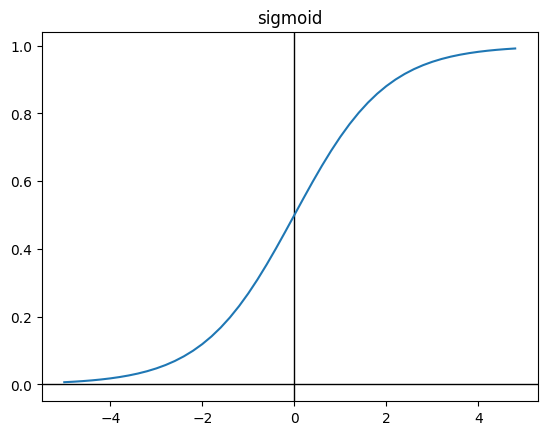

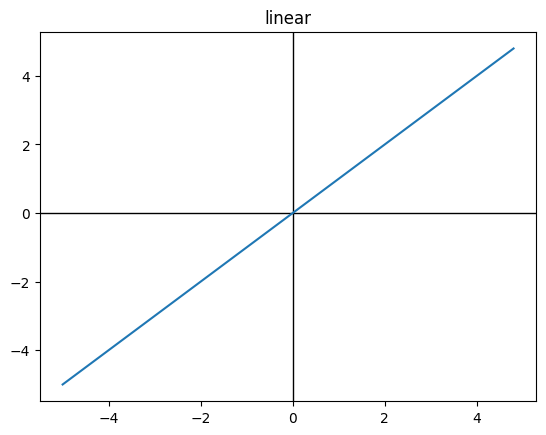

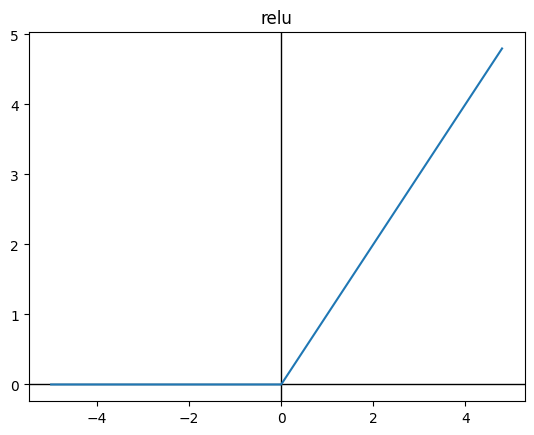

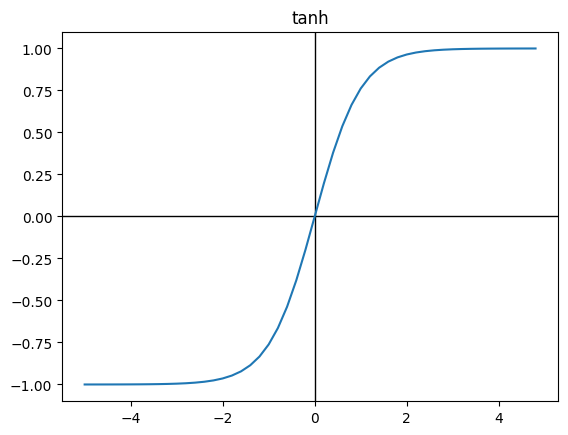

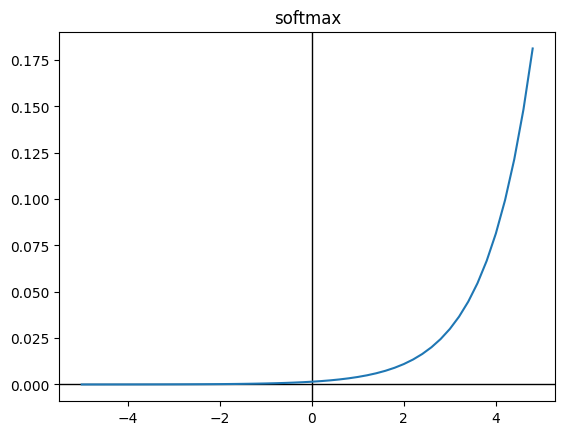

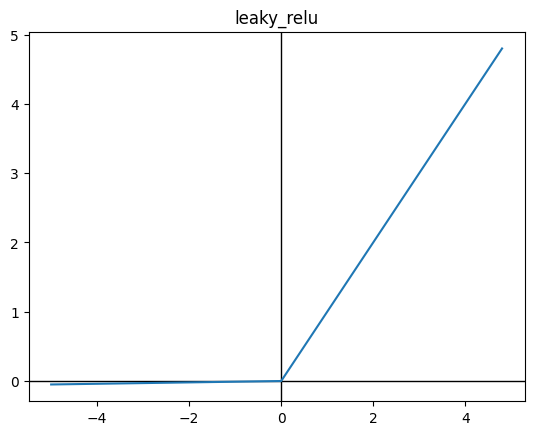

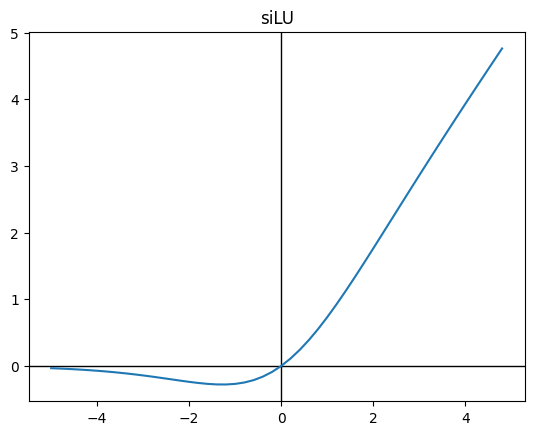

In [3]:
list_of_functions = [sigmoid, linear, relu, tanh, softmax, leaky_relu, siLU]
list_of_functions_names = ['sigmoid', 'linear', 'relu', 'tanh', 'softmax', 'leaky_relu', 'siLU']
for i in list_of_functions:
    x = np.arange(-5, 5, 0.2)
    y = i(x)
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.plot(x, y)
    plt.title(list_of_functions_names[list_of_functions.index(i)])
    plt.show()

Tiếp theo, chúng ta sẽ cùng tìm hiểu về các hàm mất mát(loss function)

Các hàm loss function:
- Mean Squared Error Loss
- Mean Absolute Error Loss
- Cross-Entropy Loss
- ...

Mean Squared Error Loss:
Công thức: L(y, y^) = 1/n * Σ(y - y^)^2
Ứng dụng: Các bài hồi quy
Giải thích công thức:
- y: nhãn thực tế
- y^: nhãn dự đoán
- (y - y^)^2: bình phương của hiệu giữa nhãn thực tế và nhãn dự đoán
- Σ(y - y^)^2: tổng của bình phương của hiệu giữa nhãn thực tế và nhãn dự đoán
- 1/n * Σ(y - y^)^2: trung bình của tổng bình phương của hiệu giữa nhãn thực tế và nhãn dự đoán
- Mean Squared Error Loss giảm khi nhãn dự đoán gần với nhãn thực tế, tăng khi nhãn dự đoán xa nhãn thực tế

Mean Absolute Error Loss:
Công thức: L(y, y^) = 1/n * Σ|y - y^|
Ứng dụng: Các bài hồi quy
Giải thích công thức:
- y: nhãn thực tế
- y^: nhãn dự đoán
- |y - y^|: trị tuyệt đối của hiệu giữa nhãn thực tế và nhãn dự đoán
- Σ|y - y^|: tổng của trị tuyệt đối của hiệu giữa nhãn thực tế và nhãn dự đoán
- 1/n * Σ|y - y^|: trung bình của tổng trị tuyệt đối của hiệu giữa nhãn thực tế và nhãn dự đoán
- Mean Absolute Error Loss giảm khi nhãn dự đoán gần với nhãn thực tế, tăng khi nhãn dự đoán xa nhãn thực tế

Cross-Entropy Loss:
Công thức: L(y, y^) = -Σy * log(y^)
Ứng dụng: Phân loại nhị phân, phân loại nhiều lớp
Giải thích công thức:
- y: nhãn thực tế
- y^: nhãn dự đoán
- log(y^): logarit tự nhiên của y^
- -Σy * log(y^): tổng của y * log(y^)
- Cross-Entropy Loss giảm khi nhãn dự đoán gần với nhãn thực tế, tăng khi nhãn dự đoán xa nhãn thực tế
- ta sử dụng logarit tự nhiên để giảm giá trị của hàm loss khi nhãn dự đoán gần với nhãn thực tế

Phần tiếp theo, mình sẽ nói về một số các layers phổ biến trong mạng neural network như: Dense, Convolutional, Pooling, Flatten, Dropout, BatchNormalization, Activation, Input, Output, LSTM, GRU, Bidirectional, Embedding, ...
- Dense: là một layer cơ bản trong mạng neural network, mỗi node trong layer này sẽ kết nối với tất cả các node trong layer trước và sau nó.
- Convolutional: là một layer sử dụng trong mạng neural network, mình đã nói chi tiết ở bài CNN trước đó. Link: https://github.com/VuThanhLam124/Machine-Learning-Simple/blob/main/CNN.ipynb
- Pooling: là một layer sử dụng trong mạng neural network, mình đã nói chi tiết ở bài CNN trước đó. Link: https://github.com/VuThanhLam124/Machine-Learning-Simple/blob/main/CNN.ipynb
- Flatten: Được sử dụng để chuyển đổi một tensor thành một vector, nó sẽ giữ nguyên số lượng phần tử của tensor.
- Dropout: Là một layer sử dụng trong mạng neural network, nó sẽ loại bỏ một số node ngẫu nhiên trong mạng để tránh overfitting.
- BatchNormalization: Là một layer sử dụng trong mạng neural network, nó sẽ chuẩn hóa dữ liệu đầu vào để giúp mạng học tốt hơn.
- ...

Hãy tìm hiểu về Flatten layer:

Flatten layer là một layer chuyển đổi một tensor đa chiều thành một vector. Ta hãy thử nghĩ theo một cách đơn giản, giả sử ta có một khối rubik 3x3x3, ta muốn chuyển nó thành một vector 1 chiều, ta sẽ chuyển nó thành một vector 27 chiều.

=> Đó chính là chức năng của Flatten layer, chuyển một tensor đa chiều thành một vector 1 chiều. 

Công thức chuyển đổi:
- Nếu tensor có shape (batch_size, d1, d2, ..., dn) thì sau khi qua Flatten layer, tensor sẽ có shape (batch_size, d1*d2*...*dn)
- Ví dụ: tensor có shape (100, 3, 3, 3) sau khi qua Flatten layer sẽ có shape (100, 27)
- Ví dụ: tensor có shape (100, 4, 4, 4) sau khi qua Flatten layer sẽ có shape (100, 64)
- Ví dụ: tensor có shape (100, 2, 2, 2, 2) sau khi qua Flatten layer sẽ có shape (100, 16)
- Ví dụ: tensor có shape (100, 2, 2, 2, 2, 2) sau khi qua Flatten layer sẽ có shape (100, 32)

Thông thường, Flatten layer được sử dụng ở sau các lớp như Convolution cuối cùng, khi chúng ta đã thu được feature map, sau đó sử dụng các layer Dense để thực hiện các phép toán tuyến tính.

Dense thì như mình đã viết ở trên, là một layer thực hiện phép nhân ma trận giữa input và weight, sau đó cộng bias và áp dụng hàm kích hoạt, giúp mô hình học được các mối quan hệ phức tạp giữa các đặc trưng của dữ liệu.


Giờ tới Dropout:
- Dropout là một kỹ thuật regularization phổ biến nhất trong deep learning. Kỹ thuật này ngẫu nhiên bỏ qua một số unit trong quá trình training, giúp mô hình tránh overfitting.
- Lấy ví dụ với một layer có 1000 unit, ta muốn áp dụng dropout với tỉ lệ 0.2, tức là mỗi lần training, ta sẽ bỏ qua 200 unit ngẫu nhiên.
- Tuy nhiên nhược điểm của dropout cũng chính là vì nó bỏ qua một số unit, nên mô hình sẽ không học được thông tin từ những unit bị bỏ qua. 
- Để giải quyết vấn đề này, ta sẽ scale output của layer sau dropout với 1/(1 - dropout_rate) để đảm bảo tổng giá trị output không thay đổi.
- Đặc biệt, trong các mô hình CNN, sau nhiều lớp convolution, mình còn cảm thấy dropout không còn hiệu quả do số lượng unit mà các lớp convolution và pooling giảm đi là rất nhiều.
- Từ đó, dropout không mang nhiều ý nghĩa trong việc tránh overfitting.
- Thay vì dùng dropout để tránh overfitting, mình khuyến khích các bạn nên augment dữ liệu, tăng số lượng dữ liệu training, sử dụng các kỹ thuật regularization khác như L1, L2 regularization...


Tiếp theo, Batch Normalization:
Đây là một kỹ thuật chuẩn hóa dữ liệu đầu vào của mỗi layer về phân phối chuẩn với mean = 0 và variance = 1.

Thử quay lại lí thuyết về mean và variance, ta có thể hiểu rằng mean là giá trị trung bình của dữ liệu, variance là độ lệch của dữ liệu so với mean.

Công thức mean = sum(x) / n

công thức variance = sum((x - mean)^2) / n, ta thấy rằng nếu mean = 0 thì variance sẽ phản ánh độ lệch của dữ liệu so với trục hoành.

Do đó, nếu mean = 0 thì dữ liệu sẽ tập trung ở trục hoành, nếu variance = 1 thì dữ liệu sẽ phân bố đều ở cả 2 phía của trục hoành.

Một trong những ưu điểm đầu tiên của batch normalization là giúp giảm overfitting. Batch normalization giúp giảm overfitting bằng cách giảm sự phụ thuộc của mô hình vào một số node cụ thể.

Dễ thấy rằng nếu một node quá quan trọng, mô hình sẽ phụ thuộc vào node đó, khiến cho mô hình dễ bị overfitting.

Ưu điểm thứ 2 của batch normalization là giúp tăng tốc độ học của mô hình. Batch normalization giúp giảm sự phụ thuộc của mô hình vào một số node cụ thể, mà mô hình học nhanh hơn do không cần phải học nhiều node.


Giờ mình sẽ thử test các phương pháp với bộ data chó mèo và để so sánh kết quả.

Link Data: https://www.kaggle.com/datasets/tongpython/cat-and-dog/data

Import thư viện cần dùng:

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import os
import shutil
from IPython.display import clear_output
import cv2

In [5]:
train_data = keras.utils.image_dataset_from_directory(
    directory = "dog and cat/training_set/training_set",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(196, 196),
    color_mode='grayscale',
    shuffle=True,
)
"""
giải thích:
- labels="inferred": tự động nhận diện label từ thư mục
- label_mode="int": label dạng số
- color_mode="grayscale": ảnh gray
- batch_size=32: batch size
- image_size=(256, 256): kích thước ảnh
- shuffle=True: xáo trộn dữ liệu
"""

Found 8005 files belonging to 2 classes.


'\ngiải thích:\n- labels="inferred": tự động nhận diện label từ thư mục\n- label_mode="int": label dạng số\n- color_mode="grayscale": ảnh gray\n- batch_size=32: batch size\n- image_size=(256, 256): kích thước ảnh\n- shuffle=True: xáo trộn dữ liệu\n'

In [6]:
# Tương tự, ta có thể tạo tập validation
val_data = keras.utils.image_dataset_from_directory(
    directory = "dog and cat/test_set/test_set",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(196, 196),
    color_mode="grayscale",
    shuffle=True,
)

Found 2023 files belonging to 2 classes.


In [7]:
def process(image,label):
    tf.cast(image/255,tf.float32)
    return image,label
train_data = train_data.map(process)
val_data = val_data.map(process)

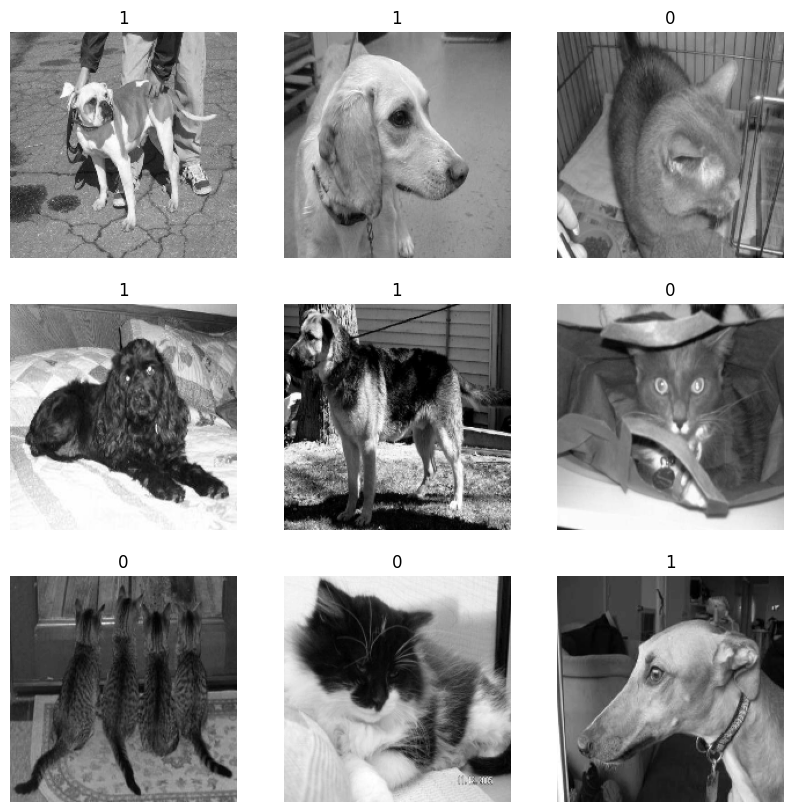

In [8]:
# thử plot 10 ảnh đầu tiên và label tương ứng
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")[:,:,0], cmap='gray')
        plt.title(int(labels[i]))
        plt.axis("off")

In [9]:
# Sử dụng GPU
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(256,256, 1)))

model.add(layers.Conv2D(64, (3, 3),padding = 'same', activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3),padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, (3, 3),padding = 'same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3),padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
"""
Nhận xét về model:

- Model sử dụng Convolutional Neural Network (CNN) với 5 lớp Conv2D và 1 lớp Dense.
- Model sử dụng hàm activation là ReLU.
- Model sử dụng hàm activation là softmax ở lớp output.
- Model sử dụng hàm loss là sparse_categorical_crossentropy.
- Model sử dụng optimizer là Adam.
- Model sử dụng metric là accuracy.

    """

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 dropout_14 (Dropout)        (None, 256, 256, 64)      0         
                                                                 
 conv2d_38 (Conv2D)          (None, 254, 254, 32)      18464     
                                                                 
 conv2d_39 (Conv2D)          (None, 254, 254, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                     

Mình sẽ train ở Kaggle nhé, laptop mình dùng GPU RTX 3050 khá yếu nên không allocated được chi phí tính toán cho tất cả tham số của mô hình.